<a href="https://colab.research.google.com/github/AndreaBerce/operational-research-project/blob/main/progetto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import random
import itertools
import matplotlib.pyplot as plt

# Base class
class SymmetricTPS:

  """
  Initialization of objects
  """
  def __init__(self, distance_matrix):
    self.distance_matrix = distance_matrix[:]
    self.solution = [x for x in range(0, len(self.distance_matrix) ) ]
    self.solutions = [[x for x in range(0, len(self.distance_matrix) ) ]]


  """
  Calculation of the cost of a route
  """
  def cost(self, route):
    dm = self.distance_matrix

    count = 0
    for i in range(0, len(route) - 1 ):
      count += dm[ route[i] ][ route[i+1] ]
    count += dm[ route[len(route) - 1] ][ route[0] ]

    return count


  """
  Print of a route
  """
  def print_route(self, route = None):
    plan_output = 'Route:\n'
    if route == None:
      route = self.solution
      plan_output = 'Route solution:\n'
    
    for item in route:
      plan_output += ' {} ->'.format(item)
    plan_output += ' {}\n'.format(route[0])

    plan_output += 'Cost of route: {}'.format(self.cost(route))
    print(plan_output)


  """
  Calculation of the costs of all stored routes
  """
  def history_costs(self):
    return [self.cost(x) for x in self.solutions]

  """
  Print of the costs of all stored routes
  """
  def print_history(self):
    #print( '\n'.join(str(x) for x in self.history_costs())  )
    print("Storia")
    for x in self.solutions:
      self.print_route(x)


  """
  2-opt local search algorithm
  """
  def two_opt(self, route = None):
    if route == None:
      route = self.solution[:]
    else:
      route = route[:]
    best  = route[:]

    improved = True
    while improved:
      improved = False
      for i in range(1, len(route) - 2):
        for j in range(i + 1, len(route)):
          if j - i == 1: continue
          new_route = route[:]
          new_route[i:j] = route[j - 1:i - 1: -1]
          if self.cost(new_route) < self.cost(best):
            best = new_route
            improvement = True
            route = best
    return best
  

  """
  Swap two items in a list
  """
  @staticmethod
  def swap_two_items(route, i, j):
    temp     = route[i]
    route[i] = route[j]
    route[j] = temp
  

  """
  City swap local search algorithm
  """
  def city_swap(self, route = None):
    if route == None:
      route = self.solution[:]
    else:
      route = route[:]
    cost_route = self.cost(route)

    best  = route[:]
    cost_best = self.cost(best)
    N = len(route) - 1

    improved = True
    while improved:
      improved = False
      for i in range(0, N - 1):
        for j in range(i + 1, N):
          self.swap_two_items(route, i, j)
          cost_route = self.cost(route)
          if cost_route < cost_best:
            best = route[:]
            cost_best = cost_route
            improvement = True
            break
          self.swap_two_items(route, j, i)

    return best
  

  """
  Swap element in a list
  """
  @staticmethod
  def swap_item(route, idx, i):
    route.remove(i)
    route.insert(idx, i)


  """
  City insert local search algorithm
  """
  def city_insert(self, route = None):
    if route == None:
      route = self.solution[:]
    else:
      route = route[:]
    cost_route = self.cost(route)

    best  = route[:]
    cost_best = self.cost(best)
    N = len(route) - 1

    improved = True
    while improved:
      improved = False
      for i in range(0, N):
        for idx in [x for x in range(N) if x != i]:
          self.swap_item(route, idx, i)
          cost_route = self.cost(route)
          if cost_route < cost_best:
            best = route[:]
            cost_best = cost_route
            improvement = True
            break
          self.swap_item(route, idx, i)

    return best
  

  """
  Rotation of elements in a list
  """
  @staticmethod
  def rotation(route, i):
    for _ in itertools.repeat(None, i):
      route.append( route.pop(0) )


  """
  Perform a random 4-opt ("double bridge") move on a tour.
  E.g.
  Step 1 rotation items
    0   1   2   3   4   5   6   7
    random number = 2
    5   6   7   0   1   2   3   4
  
  Step 2 select node
      A--B             A  B             0--1             0  1
     /    \           /|  |\           /    \           /|  |\
    H      C         H------C         7      2         7------2
    |      |   -->     |  |           |      |   -->     |  |
    G      D         G------D         6      3         6------3
     \    /           \|  |/           \    /           \|  |/
      F--E             F  E             5--4             5  4

  Step 3 rearrangement
      0   1   2   3   4   5   6   7

    ..A   F...G   D...E   B...C   H...
    ..0   5...6   3...4   1...2   7...
  
  Where edges AB, CD, EF and GH are chosen randomly.
  """
  def double_bridge(self, route):
    if route == None:
      route = self.solution[:]
    else:
      route = route[:]

    # Step 1
    random_number = random.randint(0, len(route))
    self.rotation(route, random_number)

    # Step 2
    dim = ( (len(route) - 1) / 4 ) - 1
    A = random.randint(0, dim)
    B = A + 1
    C = B + random.randint(1, dim)
    D = C + 1
    E = D + random.randint(1, dim)
    F = E + 1
    G = F + random.randint(1, dim)
    H = G +1

    # Step 3
    new_route = []
    if A == 0:
      new_route = [ route[A] ]
    else:
      new_route.extend( route[0:A+1] )

    new_route.extend( route[F:G+1] )
    new_route.extend( route[D:E+1] )
    new_route.extend( route[B:C+1] )

    dim = len(route)
    if H == (dim - 1):
      new_route.append( route[H] )
    else:
      new_route.extend( route[H:(dim)] )

    return new_route
  

  """
  E.g.
  Step 1 rotation items
    0   1   2   3   4   5   6   7
    random number = 2
    5   6   7   0   1   2   3   4

  Step 2 select node
      A--B             A      B             0--1             0      1
     /    \           /|      |\           /    \           /|      |\ 
    H      C         H----------C         7      2         7----------2
    |      |   -->     |      |           |      |   -->     |      |
    G      D           G      D           6      3           6      3
     \    /             \    /             \    /             \    /
      F--E               F--E               5--4               5--4

  Step 3 rearrangement
      0   1   2   3   4   5   6   7

    ..A   G...F   E...D   B...C   H...
    ..0   6...5   4...3   1...2   7...
  """
  def wolf_s_mouth(self, route):
    if route == None:
      route = self.solution[:]
    else:
      route = route[:]

    # Step 1
    random_number = random.randint(0, len(route))
    self.rotation(route, random_number)

    # Step 2
    dim = ( (len(route) - 1) / 4 ) - 1
    A = random.randint(0, dim)
    B = A + 1
    C = B + random.randint(1, dim)
    D = C + 1
    E = D + random.randint(1, dim)
    F = E + 1
    G = F + random.randint(1, dim)
    H = G +1

    # Step 3
    new_route = []
    if A == 0:
      new_route = [ route[A] ]
    else:
      new_route.extend( route[0:A+1] )
    new_route.extend( route[G:F-1:-1] )
    new_route.extend( route[E:D-1:-1] )
    new_route.extend( route[B:C+1] )
    new_route.extend( route[H:len(route)] )

    return new_route
    
    return False
  

  """
  Aligns the list of routes from 0
  """
  @staticmethod
  def aligns_from_0(route):

    SymmetricTPS.rotation(route, route.index(0) )
    if route[1] > route[len(route)-1]:
      SymmetricTPS.rotation(route, 1 )
      route.reverse()
    
    return route


  """
  Calculate if the route is better than the current solution
  """
  def is_best(self, route):
    cost_sol = self.cost(self.solution)
    cost_route = self.cost(route)

    if cost_sol > cost_route:
      self.solution = self.aligns_from_0( route[:] )
    
    return True


  """
  Accentuation algorithm of the best solution found
  """
  def better(self, tsp1, tsp2):
    cost_tsp1 = self.cost(tsp1)
    cost_tsp2 = self.cost(tsp2)

    sol = []
    if cost_tsp1 < cost_tsp2:
      sol = tsp1[:]
    else:
      sol = tsp2[:]
    
    self.is_best(sol)

    return sol

  
  """
  Accentuation algorithm of the last solution found
  """
  def last(self, tsp1, tsp2):
    self.is_best(tsp2)
    return tsp2[:]


  """
  Iterated Local Search algorithm
  """
  def ils(self, ls, pb, ac, n=5):
    # Local search algorithm selection
    if ls == "2-opt":
      localSearch = self.two_opt
    elif ls == "city_swap":
      localSearch = self.city_swap
    elif ls == "city_insert":
      localSearch = self.city_insert
    else:
      return False
    
    # Diversification algorithm selection
    if pb == "double_bridge":
      perturbation = self.double_bridge
    elif pb == "wolf_s_mouth":
      perturbation = self.wolf_s_mouth
    else:
      return False
    
    # Acceptance algorithm selection
    if ac == "better":
      acceptanceTest = self.better
    elif ac == "last":
      acceptanceTest = self.last
    else:
      return False

    # Iterated Local Search
    x = localSearch()
    self.solution = self.aligns_from_0( x[:] )
    self.solutions.append( self.aligns_from_0( x[:] ) )
    i = 0
    while i < n:
      x_pr = perturbation(x)

      x_ls = localSearch(x_pr)
      
      self.solutions.append( self.aligns_from_0(x_ls[:]) )

      x = acceptanceTest(x, x_ls)

      i += 1

    return True


In [ ]:
# Dataset bays29 with the best route costing 2020
distance_matrix = [
    [  0, 107, 241, 190, 124,  80, 316,  76, 152, 157, 283, 133, 113, 297, 228, 129, 348, 276, 188, 150,  65, 341, 184,  67, 221, 169, 108,  45, 167],
    [107,   0, 148, 137,  88, 127, 336, 183, 134,  95, 254, 180, 101, 234, 175, 176, 265, 199, 182,  67,  42, 278, 271, 146, 251, 105, 191, 139,  79],
    [241, 148,   0, 374, 171, 259, 509, 317, 217, 232, 491, 312, 280, 391, 412, 349, 422, 356, 355, 204, 182, 435, 417, 292, 424, 116, 337, 273,  77],
    [190, 137, 374,   0, 202, 234, 222, 192, 248,  42, 117, 287,  79, 107,  38, 121, 152,  86,  68,  70, 137, 151, 239, 135, 137, 242, 165, 228, 205],
    [124,  88, 171, 202,   0,  61, 392, 202,  46, 160, 319, 112, 163, 322, 240, 232, 314, 287, 238, 155,  65, 366, 300, 175, 307,  57, 220, 121,  97],
    [ 80, 127, 259, 234,  61,   0, 386, 141,  72, 167, 351,  55, 157, 331, 272, 226, 362, 296, 232, 164,  85, 375, 249, 147, 301, 118, 188,  60, 185],
    [316, 336, 509, 222, 392, 386,   0, 233, 438, 254, 202, 439, 235, 254, 210, 187, 313, 266, 154, 282, 321, 298, 168, 249,  95, 437, 190, 314, 435],
    [ 76, 183, 317, 192, 202, 141, 233,   0, 213, 188, 272, 193, 131, 302, 233,  98, 344, 289, 177, 216, 141, 346, 108,  57, 190, 245,  43,  81, 243],
    [152, 134, 217, 248,  46,  72, 438, 213,   0, 206, 365,  89, 209, 368, 286, 278, 360, 333, 284, 201, 111, 412, 321, 221, 353,  72, 266, 132, 111],
    [157,  95, 232,  42, 160, 167, 254, 188, 206,   0, 159, 220,  57, 149,  80, 132, 193, 127, 100,  28,  95, 193, 241, 131, 169, 200, 161, 189, 163],
    [283, 254, 491, 117, 319, 351, 202, 272, 365, 159,   0, 404, 176, 106,  79, 161, 165, 141,  95, 187, 254, 103, 279, 215, 117, 359, 216, 308, 322],
    [133, 180, 312, 287, 112,  55, 439, 193,  89, 220, 404,   0, 210, 384, 325, 279, 415, 349, 285, 217, 138, 428, 310, 200, 354, 169, 241, 112, 238],
    [113, 101, 280,  79, 163, 157, 235, 131, 209,  57, 176, 210,   0, 186, 117,  75, 231, 165,  81,  85,  92, 230, 184,  74, 150, 208, 104, 158, 206],
    [297, 234, 391, 107, 322, 331, 254, 302, 368, 149, 106, 384, 186,   0,  69, 191,  59,  35, 125, 167, 255,  44, 309, 245, 169, 327, 246, 335, 288],
    [228, 175, 412,  38, 240, 272, 210, 233, 286,  80,  79, 325, 117,  69,   0, 122, 122,  56,  56, 108, 175, 113, 240, 176, 125, 280, 177, 266, 243],
    [129, 176, 349, 121, 232, 226, 187,  98, 278, 132, 161, 279,  75, 191, 122,   0, 244, 178,  66, 160, 161, 235, 118,  62,  92, 277,  55, 155, 275],
    [348, 265, 422, 152, 314, 362, 313, 344, 360, 193, 165, 415, 231,  59, 122, 244,   0,  66, 178, 198, 286,  77, 362, 287, 228, 358, 299, 380, 319],
    [276, 199, 356,  86, 287, 296, 266, 289, 333, 127, 141, 349, 165,  35,  56, 178,  66,   0, 112, 132, 220,  79, 296, 232, 181, 292, 233, 314, 253],
    [188, 182, 355,  68, 238, 232, 154, 177, 284, 100,  95, 285,  81, 125,  56,  66, 178, 112,   0, 128, 167, 169, 179, 120,  69, 283, 121, 213, 281],
    [150,  67, 204,  70, 155, 164, 282, 216, 201,  28, 187, 217,  85, 167, 108, 160, 198, 132, 128,   0,  88, 211, 269, 159, 197, 172, 189, 182, 135],
    [ 65,  42, 182, 137,  65,  85, 321, 141, 111,  95, 254, 138,  92, 255, 175, 161, 286, 220, 167,  88,   0, 299, 229, 104, 236, 110, 149,  97, 108],
    [341, 278, 435, 151, 366, 375, 298, 346, 412, 193, 103, 428, 230,  44, 113, 235,  77,  79, 169, 211, 299,   0, 353, 289, 213, 371, 290, 379, 332],
    [184, 271, 417, 239, 300, 249, 168, 108, 321, 241, 279, 310, 184, 309, 240, 118, 362, 296, 179, 269, 229, 353,   0, 121, 162, 345,  80, 189, 342],
    [ 67, 146, 292, 135, 175, 147, 249,  57, 221, 131, 215, 200,  74, 245, 176,  62, 287, 232, 120, 159, 104, 289, 121,   0, 154, 220,  41,  93, 218],
    [221, 251, 424, 137, 307, 301,  95, 190, 353, 169, 117, 354, 150, 169, 125,  92, 228, 181,  69, 197, 236, 213, 162, 154,   0, 352, 147, 247, 350],
    [169, 105, 116, 242,  57, 118, 437, 245,  72, 200, 359, 169, 208, 327, 280, 277, 358, 292, 283, 172, 110, 371, 345, 220, 352,   0, 265, 178,  39],
    [108, 191, 337, 165, 220, 188, 190,  43, 266, 161, 216, 241, 104, 246, 177,  55, 299, 233, 121, 189, 149, 290,  80,  41, 147, 265,   0, 124, 263],
    [ 45, 139, 273, 228, 121,  60, 314,  81, 132, 189, 308, 112, 158, 335, 266, 155, 380, 314, 213, 182,  97, 379, 189,  93, 247, 178, 124,   0, 199],
    [167,  79,  77, 205,  97, 185, 435, 243, 111, 163, 322, 238, 206, 288, 243, 275, 319, 253, 281, 135, 108, 332, 342, 218, 350,  39, 263, 199,   0],
]

great_value = 2020

# Distance matrix generator
def distance_matrix_generator(distance_matrix, percentage):
  distance_matrix = distance_matrix[:]
  dim = len(distance_matrix)
  n_random = math.ceil( ((((dim * dim) - dim) / 2) * (100 - percentage) / 100 ) -1 )

  for i in range(n_random):
    x = random.randint(0, dim)
    y = random.randint(0, dim-1)
    if y >= x: y += 1
    distance_matrix[x][y] = 10000
    distance_matrix[y][x] = 10000

    return distance_matrix

# Basic use of the class
distance_matrix_test = distance_matrix
#distance_matrix_test = distance_matrix_generator(distance_matrix2, 10)


localSearchs = ["2-opt", "city_swap", "city_insert"]     # 3/3
perturbations = ["double_bridge", "wolf_s_mouth"]        # 2/2
acceptanceTests = ["better", "last"]                     # 2/2

tsp1 = SymmetricTPS(distance_matrix_test)
tsp1.print_route()
tsp1.ils("2-opt", "double_bridge", "last", 1)
tsp1.print_history()
print()
tsp1.print_route()

Route solution:
 0 -> 1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 8 -> 9 -> 10 -> 11 -> 12 -> 13 -> 14 -> 15 -> 16 -> 17 -> 18 -> 19 -> 20 -> 21 -> 22 -> 23 -> 24 -> 25 -> 26 -> 27 -> 28 -> 0
Cost of route: 5752
Storia
Route:
 0 -> 1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 8 -> 9 -> 10 -> 11 -> 12 -> 13 -> 14 -> 15 -> 16 -> 17 -> 18 -> 19 -> 20 -> 21 -> 22 -> 23 -> 24 -> 25 -> 26 -> 27 -> 28 -> 0
Cost of route: 5752
Route:
 0 -> 26 -> 6 -> 24 -> 21 -> 13 -> 17 -> 16 -> 14 -> 10 -> 18 -> 7 -> 22 -> 23 -> 15 -> 12 -> 19 -> 3 -> 9 -> 27 -> 5 -> 11 -> 8 -> 4 -> 20 -> 1 -> 25 -> 2 -> 28 -> 0
Cost of route: 2798
Route:
 0 -> 4 -> 5 -> 11 -> 8 -> 25 -> 28 -> 2 -> 1 -> 20 -> 27 -> 7 -> 26 -> 23 -> 15 -> 22 -> 6 -> 24 -> 21 -> 16 -> 13 -> 17 -> 19 -> 18 -> 10 -> 14 -> 3 -> 9 -> 12 -> 0
Cost of route: 2480

Route solution:
 0 -> 4 -> 5 -> 11 -> 8 -> 25 -> 28 -> 2 -> 1 -> 20 -> 27 -> 7 -> 26 -> 23 -> 15 -> 22 -> 6 -> 24 -> 21 -> 16 -> 13 -> 17 -> 19 -> 18 -> 10 -> 14 -> 3 -> 9 -> 12 -> 0
Cost of route: 2480


In [ ]:
# Testing of all combinations of local search and perturbations with acceptance of the best
result_tests_better = []
i = 0
for ls in localSearchs:
  result_tests_better.append( [] )
  for pr in perturbations:
    tsp = SymmetricTPS(distance_matrix_test)
    tsp.ils(ls, pr, "better", 100)
    print(ls + '-' + pr)
    tsp.print_route()
    print()
    result_tests_better[i].append( tsp.history_costs() )
  i += 1

2-opt-double_bridge
Route solution:
 0 -> 12 -> 15 -> 23 -> 7 -> 26 -> 22 -> 6 -> 24 -> 18 -> 10 -> 21 -> 13 -> 16 -> 17 -> 14 -> 3 -> 9 -> 19 -> 20 -> 1 -> 2 -> 28 -> 25 -> 4 -> 8 -> 11 -> 5 -> 27 -> 0
Cost of route: 2039

2-opt-wolf_s_mouth
Route solution:
 0 -> 7 -> 26 -> 22 -> 6 -> 24 -> 15 -> 23 -> 12 -> 18 -> 10 -> 21 -> 13 -> 16 -> 17 -> 14 -> 3 -> 9 -> 19 -> 20 -> 1 -> 2 -> 28 -> 25 -> 4 -> 8 -> 11 -> 5 -> 27 -> 0
Cost of route: 2048

city_swap-double_bridge
Route solution:
 0 -> 20 -> 12 -> 15 -> 26 -> 22 -> 6 -> 24 -> 18 -> 10 -> 14 -> 17 -> 16 -> 21 -> 13 -> 3 -> 9 -> 19 -> 1 -> 2 -> 28 -> 25 -> 4 -> 8 -> 11 -> 5 -> 27 -> 7 -> 23 -> 0
Cost of route: 2136

city_swap-wolf_s_mouth
Route solution:
 0 -> 26 -> 22 -> 6 -> 24 -> 15 -> 18 -> 10 -> 21 -> 13 -> 16 -> 17 -> 14 -> 3 -> 9 -> 19 -> 2 -> 28 -> 25 -> 8 -> 11 -> 5 -> 4 -> 20 -> 1 -> 12 -> 23 -> 7 -> 27 -> 0
Cost of route: 2202

city_insert-double_bridge
Route solution:
 0 -> 7 -> 15 -> 18 -> 16 -> 21 -> 3 -> 9 -> 14 -> 12 ->

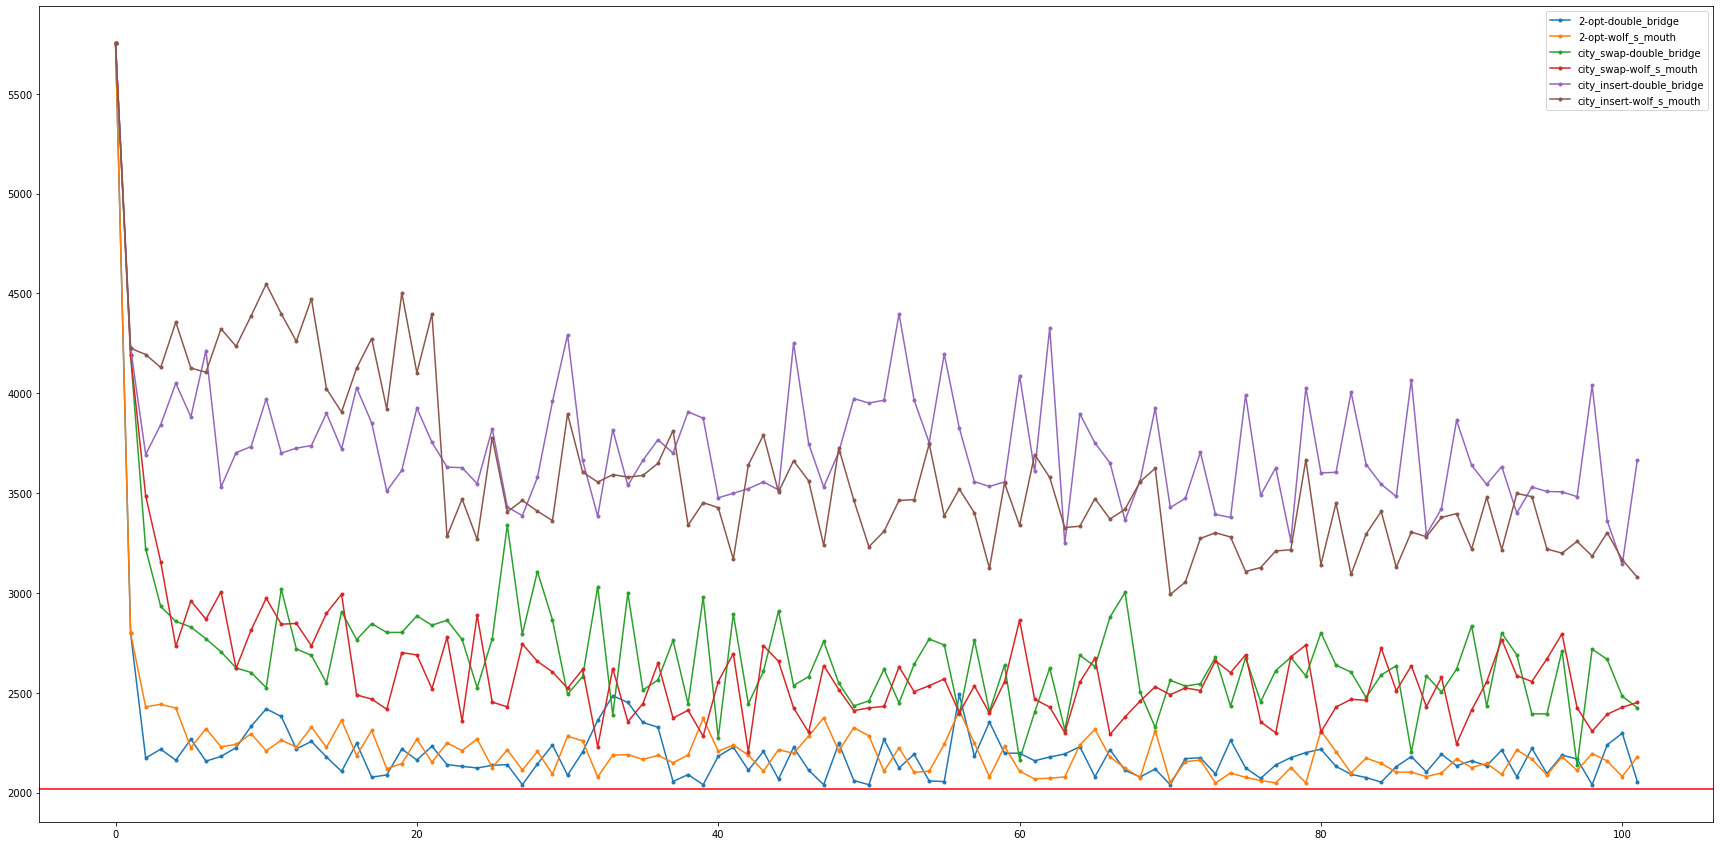

In [ ]:
# Graph of all combinations of local search and perturbations with acceptance of the best
fig, ax = plt.subplots(figsize=(30,15))
for ls in range( len(localSearchs) ):
  for pr in range( len(perturbations) ):
    lab = localSearchs[ls] + '-' + perturbations[pr]
    ax.plot(result_tests_better[ls][pr], marker='.', label=lab)

ax.axhline(y=great_value, color='r', linestyle='-')
ax.legend()

In [ ]:
# Testing of all combinations of local search and perturbations with acceptance of the last
result_tests_last = []
i = 0
for ls in localSearchs:
  result_tests_last.append( [] )
  for pr in perturbations:
    tsp = SymmetricTPS(distance_matrix_test)
    tsp.ils(ls, pr, "last", 100)
    print(ls + '-' + pr)
    tsp.print_route()
    print()
    result_tests_last[i].append( tsp.history_costs() )
  i += 1

2-opt-double_bridge
Route solution:
 0 -> 20 -> 1 -> 2 -> 28 -> 25 -> 4 -> 8 -> 11 -> 5 -> 27 -> 7 -> 26 -> 22 -> 6 -> 24 -> 10 -> 21 -> 13 -> 16 -> 17 -> 14 -> 3 -> 9 -> 19 -> 12 -> 18 -> 15 -> 23 -> 0
Cost of route: 2059

2-opt-wolf_s_mouth
Route solution:
 0 -> 12 -> 15 -> 23 -> 7 -> 26 -> 22 -> 6 -> 24 -> 18 -> 10 -> 21 -> 13 -> 16 -> 17 -> 14 -> 3 -> 9 -> 19 -> 20 -> 1 -> 2 -> 28 -> 25 -> 4 -> 8 -> 11 -> 5 -> 27 -> 0
Cost of route: 2039

city_swap-double_bridge
Route solution:
 0 -> 5 -> 11 -> 20 -> 17 -> 24 -> 6 -> 22 -> 7 -> 26 -> 23 -> 15 -> 18 -> 13 -> 16 -> 21 -> 10 -> 14 -> 3 -> 12 -> 9 -> 19 -> 1 -> 2 -> 28 -> 25 -> 4 -> 8 -> 27 -> 0
Cost of route: 2513

city_swap-wolf_s_mouth
Route solution:
 0 -> 7 -> 22 -> 26 -> 23 -> 15 -> 18 -> 24 -> 6 -> 10 -> 21 -> 16 -> 17 -> 13 -> 14 -> 3 -> 9 -> 19 -> 27 -> 5 -> 11 -> 8 -> 4 -> 20 -> 25 -> 28 -> 2 -> 1 -> 12 -> 0
Cost of route: 2342

city_insert-double_bridge
Route solution:
 0 -> 5 -> 4 -> 25 -> 8 -> 11 -> 27 -> 12 -> 20 -> 19 ->

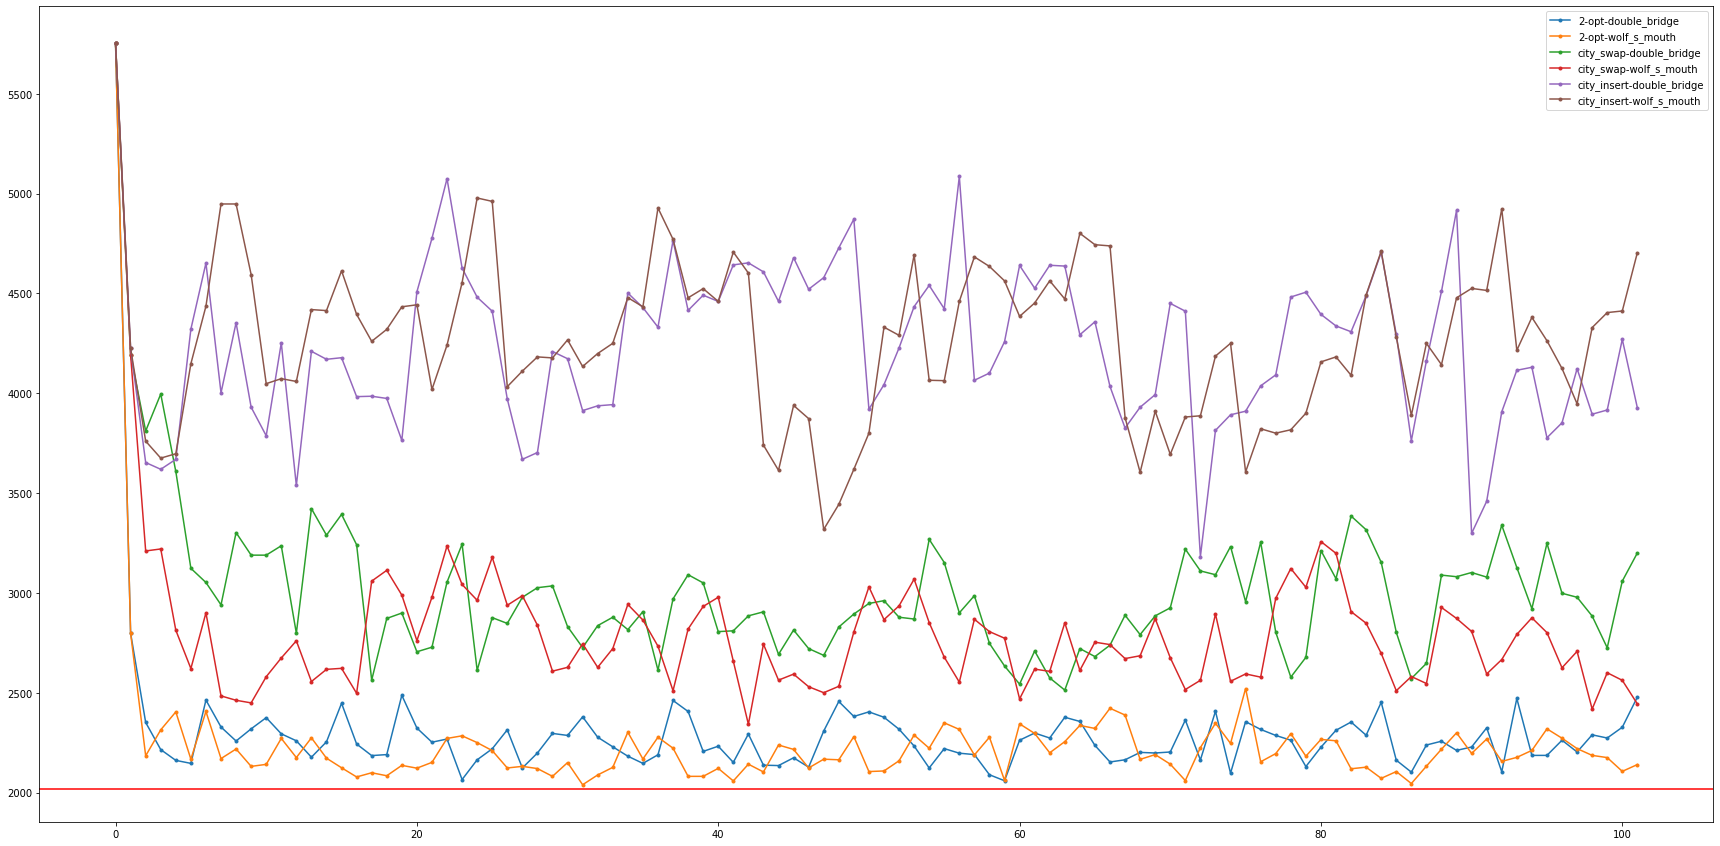

In [ ]:
# Graph of all combinations of local search and perturbations with acceptance of the last
fig, ax = plt.subplots(figsize=(30,15))

for ls in range( len(localSearchs) ):
  for pr in range( len(perturbations) ):
    lab = localSearchs[ls] + '-' + perturbations[pr]
    ax.plot(result_tests_last[ls][pr], marker='.', label=lab)

ax.axhline(y=great_value, color='r', linestyle='-')
ax.legend()

0
1


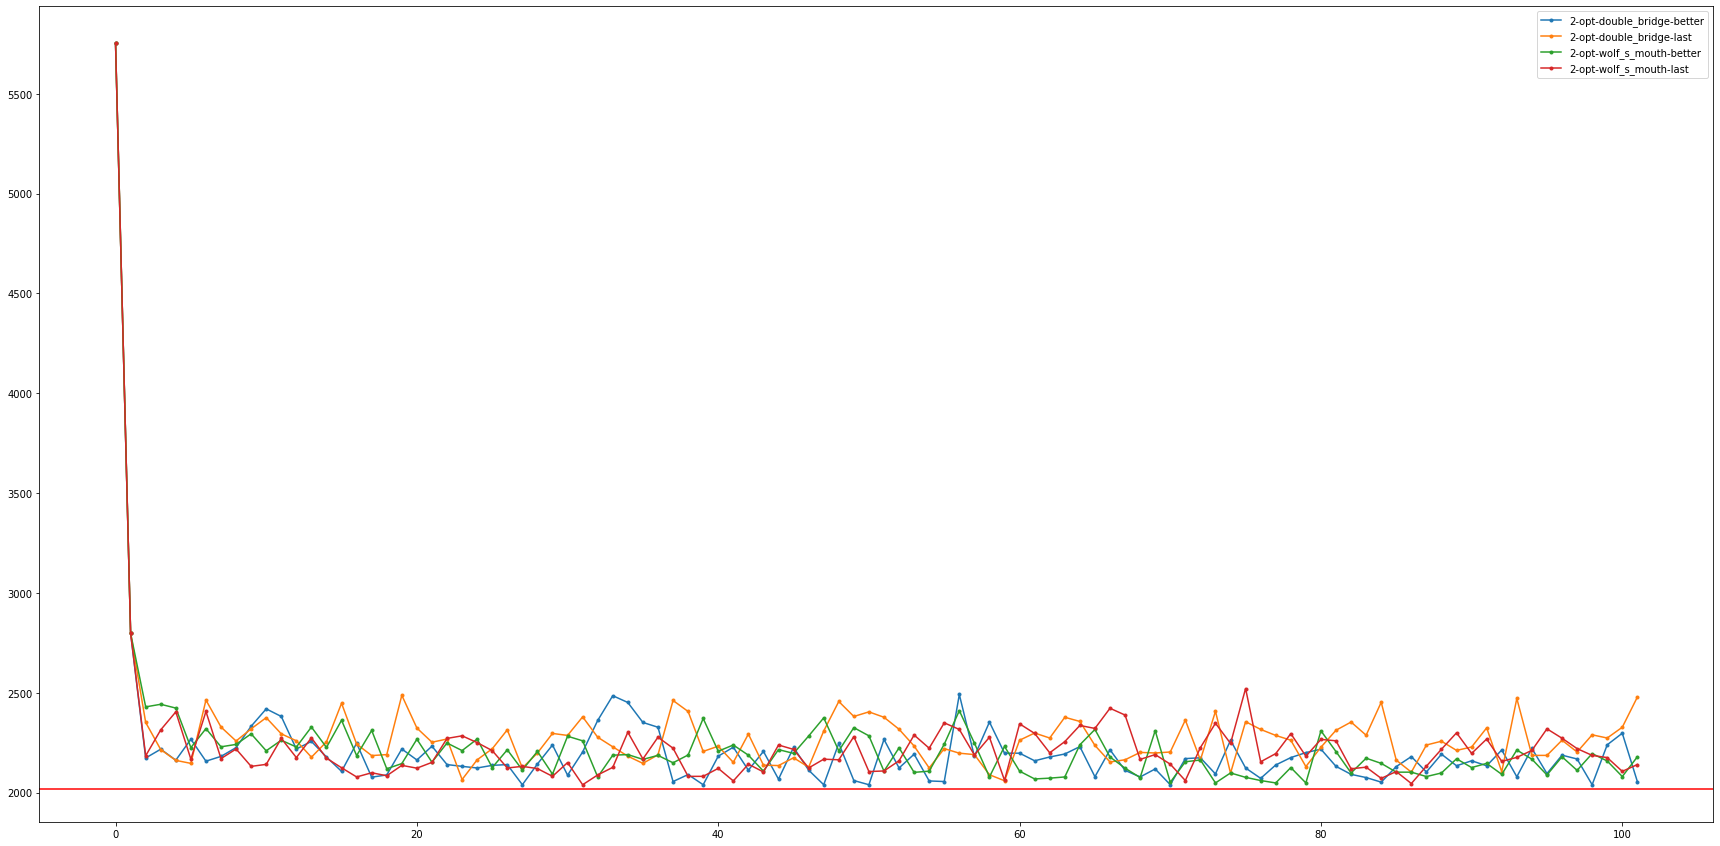

In [ ]:
fig, ax = plt.subplots(figsize=(30,15))
ls = 0

for pr in range(len(perturbations)):
  print(pr)
  lab = localSearchs[ls] + '-' + perturbations[pr] + '-' + 'better'
  ax.plot(result_tests_better[ls][pr], marker='.', label=lab)

  lab = localSearchs[ls] + '-' + perturbations[pr] + '-' + 'last'
  ax.plot(result_tests_last[ls][pr], marker='.', label=lab)

ax.axhline(y=great_value, color='r', linestyle='-')
ax.legend()